# 생체 광학 데이터 분석 AI 경진대회

https://dacon.io/competitions/official/235608/overview/description

데이터 규모가 커지면 ai 학습 시키는데 1년 2억 정도 들 수 있다
최대한 효율적으로 저비용으로 학습 할 수 있는 코드를 짜야한다.

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 판다스와 넘파이
import pandas as pd
import numpy as np

# 이미지, 시각화, 분석
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#머신러닝(인공지능), lightgbm, 선형회귀, 가볍고 가성비가 좋다 머신러닝 중에 많이 쓰는 편
import lightgbm as lgb
from lightgbm import LGBMRegressor #(기본적으로 여러 label을 못가져온다?)

# 검증평가
from sklearn.multioutput import MultiOutputRegressor # 두개 이상의 label을 가질 경우
from sklearn.model_selection import cross_val_score # 교차 검증
from sklearn.metrics import mean_absolute_error # loss 함수 함수 MA (절댓값으로 빼준다?)

# 반복문 시간을 알려주는 것, for 반복문 쓴 거 보다 10배 빠름
from tqdm import tqdm
# 불필요한 오류를 안보이게 해줌
import warnings ; warnings.filterwarnings('ignore')

## 데이터 불러오기

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42


In [4]:
# id : index number랑 동일, 필요없음
# rho : 측정거리(mm) 25, 10, 15, 20
train['rho'].unique()

array([25, 10, 15, 20], dtype=int64)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   rho      10000 non-null  int64  
 2   650_src  10000 non-null  float64
 3   660_src  10000 non-null  float64
 4   670_src  10000 non-null  float64
 5   680_src  10000 non-null  float64
 6   690_src  10000 non-null  float64
 7   700_src  10000 non-null  float64
 8   710_src  10000 non-null  float64
 9   720_src  10000 non-null  float64
 10  730_src  10000 non-null  float64
 11  740_src  10000 non-null  float64
 12  750_src  10000 non-null  float64
 13  760_src  10000 non-null  float64
 14  770_src  10000 non-null  float64
 15  780_src  10000 non-null  float64
 16  790_src  10000 non-null  float64
 17  800_src  10000 non-null  float64
 18  810_src  10000 non-null  float64
 19  820_src  10000 non-null  float64
 20  830_src  10000 non-null  float64
 21  840_src  1000

<AxesSubplot:>

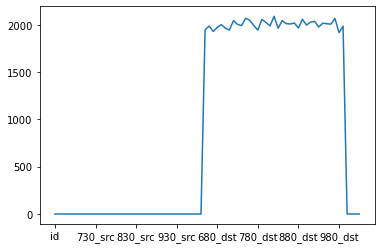

In [6]:
# 시각화를 통해 빈값을 한눈에 알아볼 수 있다.
train.isnull().sum().plot()

In [7]:
train.columns # 컬럼이 너무 많으면 이것도 ... 처리될 수 있다

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
       '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
       '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
       '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
       '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
       '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst', 'hhb', 'hbo2',
       'ca', 'na'],
      dtype='object')

In [8]:
column = ['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
          '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
          '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
          '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
          '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
          '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']
train[column].head()

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,2.447758e-18,1.894578e-18,0.000000e+00,6.412913e-18,1.098559e-17,8.907142e-19,NaN,0.000000e+00,NaN,0.000000e+00,...,NaN,3.527371e-18,NaN,6.455564e-19,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17
1,0.000000e+00,0.000000e+00,0.000000e+00,1.995530e-10,1.025259e-10,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,...,2.647633e-09,NaN,5.233480e-09,1.264238e-08,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN
2,1.677445e-19,3.763590e-20,NaN,0.000000e+00,NaN,NaN,8.981651e-19,1.944683e-19,8.126907e-19,2.183200e-19,...,4.629125e-18,1.409413e-18,3.237480e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN
3,4.044975e-11,NaN,5.345363e-11,9.106886e-12,1.881458e-11,3.617201e-11,7.909656e-13,NaN,1.583839e-10,NaN,...,1.274876e-10,6.118947e-11,NaN,1.663888e-10,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN
4,4.784751e-14,NaN,0.000000e+00,1.153089e-13,0.000000e+00,0.000000e+00,1.056991e-13,0.000000e+00,0.000000e+00,2.666663e-14,...,0.000000e+00,NaN,1.537619e-14,4.996522e-14,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN


In [9]:
# 유사한 컬럼 이름 있을 경우 규칙을 찾아 추출할 수 있다.
train_dst = train.filter(regex = '_dst$', axis='columns')
train_dst.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

<AxesSubplot:>

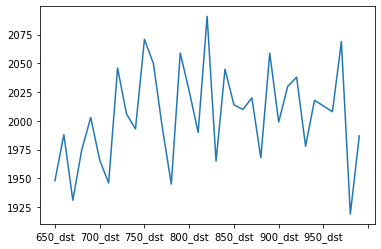

In [10]:
train_dst.isnull().sum().plot()

In [11]:
# T 행과 열을 바꿈 전치
train_dst.head().T

,0,1,2,3,4
650_dst,2.447758e-18,0.000000e+00,1.677445e-19,4.044975e-11,4.784751e-14
660_dst,1.894578e-18,0.000000e+00,3.763590e-20,NaN,NaN
670_dst,0.000000e+00,0.000000e+00,NaN,5.345363e-11,0.000000e+00
680_dst,6.412913e-18,1.995530e-10,0.000000e+00,9.106886e-12,1.153089e-13
690_dst,1.098559e-17,1.025259e-10,NaN,1.881458e-11,0.000000e+00
700_dst,8.907142e-19,0.000000e+00,NaN,3.617201e-11,0.000000e+00
710_dst,NaN,0.000000e+00,8.981651e-19,7.909656e-13,1.056991e-13
720_dst,0.000000e+00,0.000000e+00,1.944683e-19,NaN,0.000000e+00
730_dst,NaN,NaN,8.126907e-19,1.583839e-10,0.000000e+00
740_dst,0.000000e+00,0.000000e+00,2.183200e-19,NaN,2.666663e-14


<AxesSubplot:>

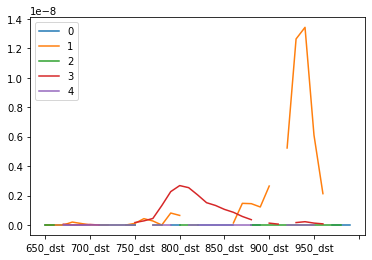

In [12]:
train_dst.head().T.plot()

<AxesSubplot:>

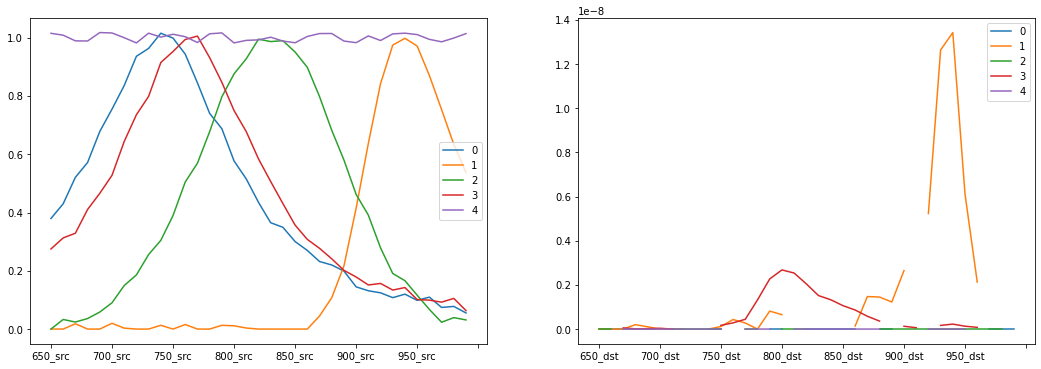

In [13]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
train.filter(regex='_src$', axis='columns').head().T.plot(ax=ax1)
train.filter(regex='_dst$', axis='columns').head().T.plot(ax=ax2)

In [14]:
# 모르는 분야라도 논문 등 정보를 찾고 이해해서 식을 세울 수 있어야한다
# 단위 차이는 반영해주나 안해주나 인공지능 학습에 큰 차이는 없을 수 있지만 해주는 게 좋긴 하다 
# 비어-람베르트 법칙 흡광도=매질의 흡수율*매질 내 빛의 이동거리(cm)*매질의 농도

## 보간 하기

<AxesSubplot:>

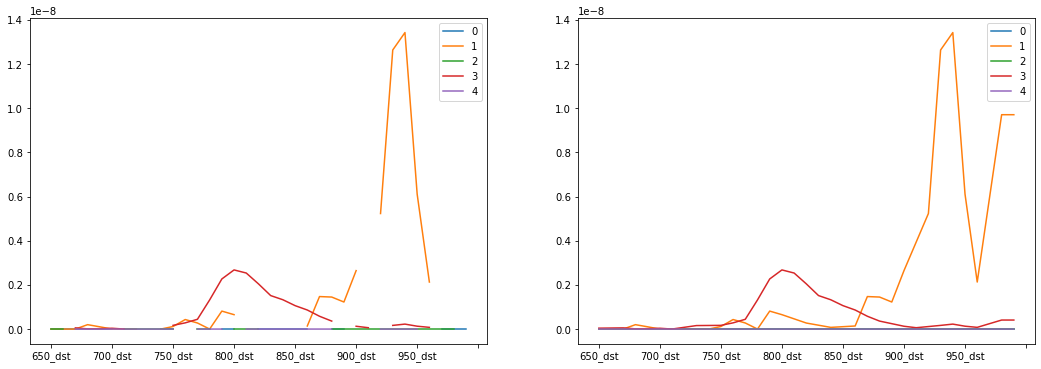

In [15]:
# 빈값을 채우는 것 보간한다 interpolate method='linear' 직선으로 이어준다 가장 기본적임
# interpolate 는 디폴트가 method='linear', axis=0 이렇게 되어있다.
# axis=0은 행 방향, axis=1은 열 방향 지금은 전치행렬이기 때문에 axis=0 행 방향으로 한다.
# method='linear'는 문자열 컬럼도 보간이 가능하지만, 다른 메소드는 보간 불가능하다
# 적절한 보간법을 찾아서 학습시켜야한다.
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
train.filter(regex='_dst$', axis='columns').head().T.plot(ax=ax1)
train.filter(regex='_dst$', axis='columns').head().T.interpolate(method='linear', axis=0).plot(ax=ax2)

In [16]:
train_dst.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [17]:
list(650 + np.arange(35)*10)

[650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990]

In [18]:
train_dst.columns = list(650 + np.arange(35)*10)
train_dst.columns

Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')

<AxesSubplot:>

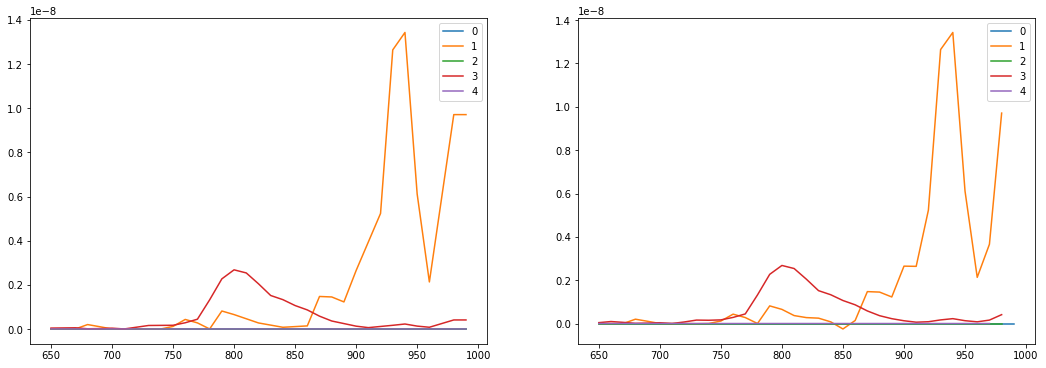

In [19]:
# cubic은 곡선 살짝 각진 형태로 보간
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
train_dst.head().T.interpolate(method='linear', axis=0).plot(ax=ax1)
train_dst.head().T.interpolate(method='cubic', axis=0).plot(ax=ax2)

<AxesSubplot:>

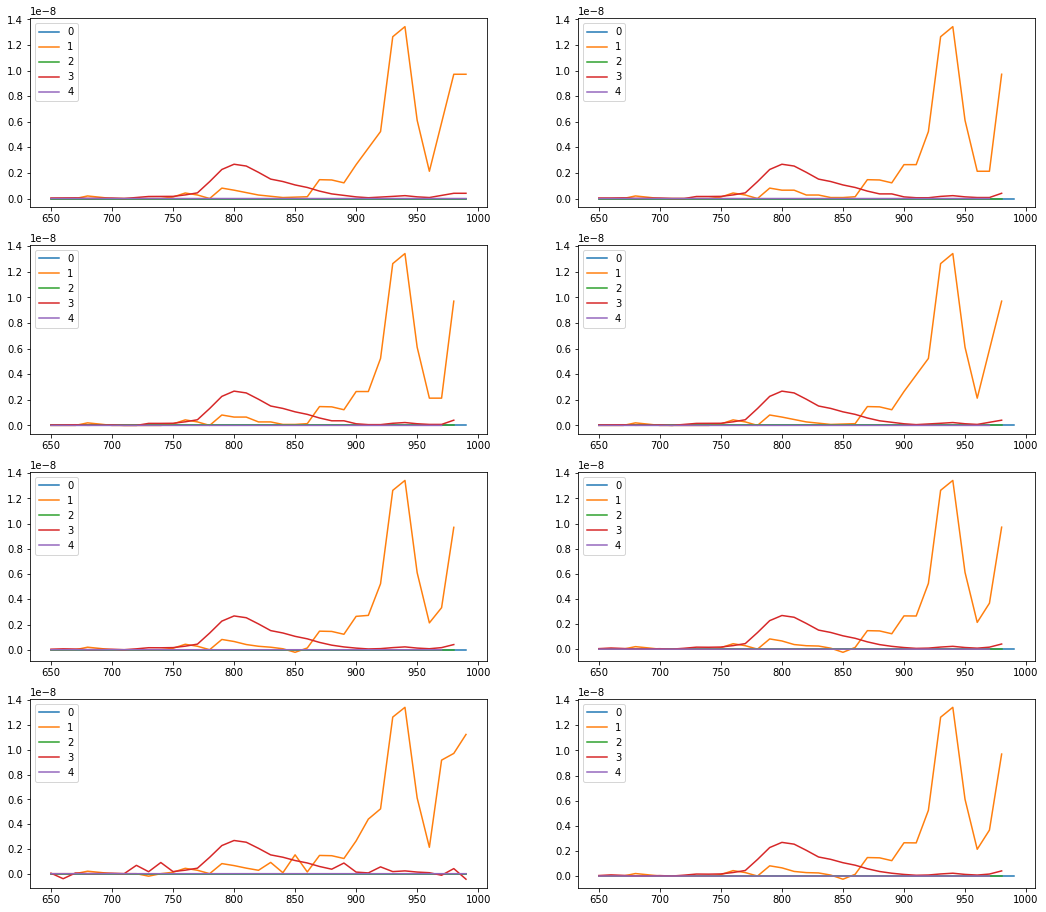

In [20]:
# linear, nearest, zero, slinear, quadratic, cubit, spline, polynomial
# linear, nearest, zero, slinear은 직선, quadratic, cubit, spline, polynomial은 곡선
# spline, polynomial은 곡선 oreder가 필요하다 주로 3을 쓴다
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_dst.head().T.interpolate(method='linear', axis=0).plot(ax=ax1)
train_dst.head().T.interpolate(method='nearest', axis=0).plot(ax=ax2)
train_dst.head().T.interpolate(method='zero', axis=0).plot(ax=ax3)
train_dst.head().T.interpolate(method='slinear', axis=0).plot(ax=ax4)
train_dst.head().T.interpolate(method='quadratic', axis=0).plot(ax=ax5)
train_dst.head().T.interpolate(method='cubic', axis=0).plot(ax=ax6)
train_dst.head().T.interpolate(method='spline',order=3, axis=0).plot(ax=ax7)
train_dst.head().T.interpolate(method='polynomial',order=3, axis=0).plot(ax=ax8)

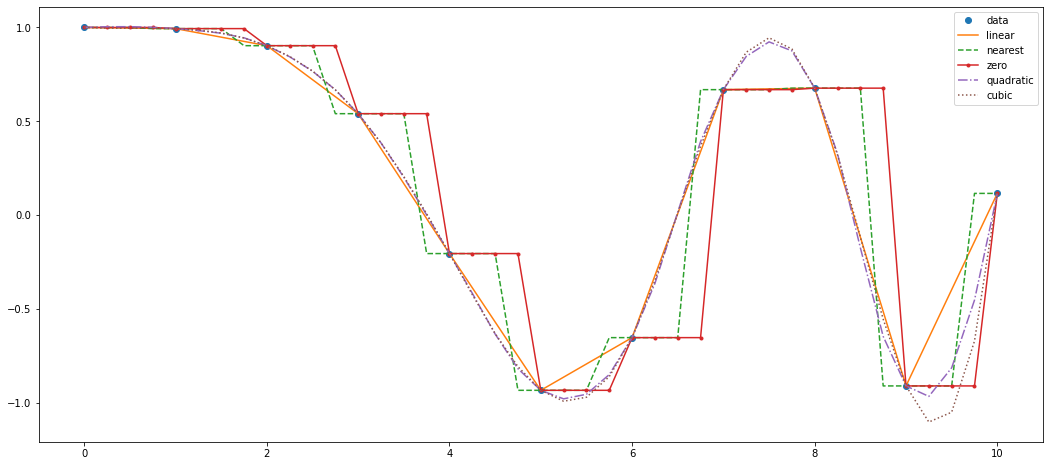

In [21]:
# 보간방법 비교
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint = True)
y = np.cos(-x**2/9)
f = interp1d(x,y) # linear 점 사이를 직선으로 이어준다
f2 = interp1d(x,y, kind = 'nearest') # nearest 계단식, 지그재그 같은 형태, 1/3위치에 데이터 
f3 = interp1d(x,y, kind = 'zero') # zero 계단식, 지그재그 같은 형태, nearest와 유사하지만 오른쪽 돌출됨
f4 = interp1d(x,y, kind = 'quadratic') # quadratic
f5 = interp1d(x,y, kind = 'cubic') # cubic

xnew = np.linspace(0, 10, num = 41,  endpoint = True)
plt.figure(figsize=(18,8))
plt.plot(x,y,'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '.-',
         xnew, f4(xnew), '-.', xnew, f5(xnew), ':',)
plt.legend(['data', 'linear', 'nearest', 'zero', 'quadratic', 'cubic'])
plt.show()

In [22]:
train_dst.columns = list(650 + np.arange(35)*10) #문자열 컬럼을 숫자 컬럼으로 변경
train_dst = train_dst.interpolate(method='polynomial', order=3, axis=1) # polynomial 보간으로 빈값 채움
train_dst_i = train_dst.interpolate(method='linear', axis=1) #linear 보간으로 빈값 채움
# 보간하고 숫자로 바꿨던 컬럼을 다시 문자열로 되돌려놓기
train_dst_i.columns = train.filter(regex='_dst$', axis='columns').columns # 숫자 컬럼을 문자열 컬럼으로 되돌림
train_dst_i.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [23]:
test_dst = test.filter(regex='_dst$', axis='columns') #_dst 컬럼 추출
test_dst.columns = list(650 + np.arange(35)*10) # 문자열 컬럼을 숫자 컬렴으로 변환
test_dst = test_dst.interpolate(method='polynomial', order=3, axis=1) # polynomial 보간으로 빈값 채움
test_dst_i = test_dst.interpolate(method='linear', axis=1) #linear 보간
test_dst_i.columns = test.filter(regex='_dst$', axis='columns').columns # 숫자 컬럼을 문자열 컬럼으로 변경
test_dst_i.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

<AxesSubplot:>

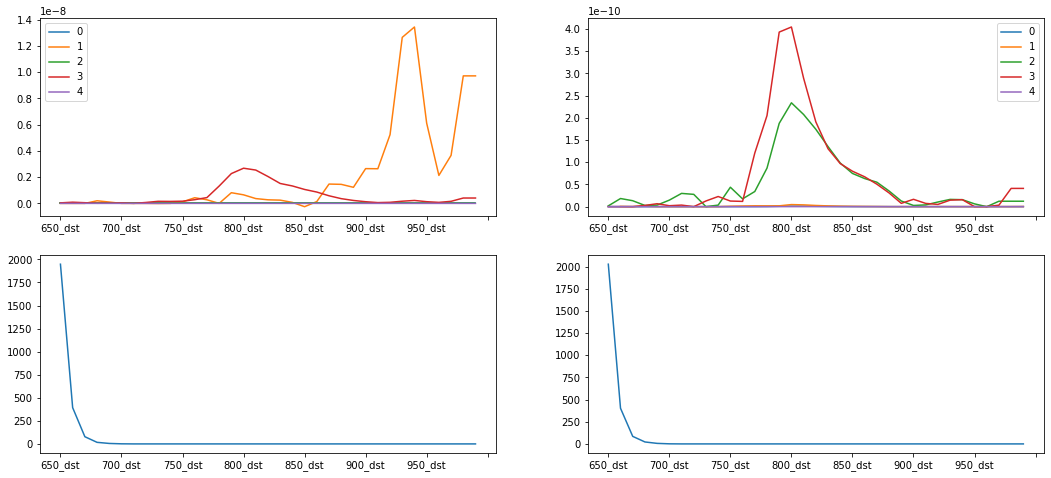

In [24]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)
train_dst_i.head().T.plot(ax=ax1)
test_dst_i.head().T.plot(ax=ax2)
train_dst_i.isnull().sum().plot(ax=ax3)
test_dst_i.isnull().sum().plot(ax=ax4)
# 이렇게 해도 650~700 쯤 값은 채워지지 않고 있다. 이를 추가로 보간해야한다.

In [25]:
# 오른쪽 값으로 보간
# 빈값이면 바로 오른쪽 값을 넣어준다
# 문자열에 수식 입력 i = 0 이면, '980_dst', i=1이면 '970_dst' ...
for i in range(34):
# 리니어 보간이라 990은 무조건 차있다 1000도 없으니 980부터 시작한다
    train_dst_i.loc[train_dst_i[f'{980-(i*10)}_dst'].isnull(),
                    f'{980-(i*10)}_dst'] = train_dst_i.loc[train_dst_i[f'{980-(i*10)}_dst'].isnull(),
                                                            f'{990-(i*10)}_dst']
# = train_dst_i[f'{990-(i*10)}_dst'] 이렇게 해도 될 것 같은데, 일단 배운대로 두기
    test_dst_i.loc[test_dst_i[f'{980-(i*10)}_dst'].isnull(),
                   f'{980-(i*10)}_dst'] = test_dst_i.loc[test_dst_i[f'{980-(i*10)}_dst'].isnull(),
                                                         f'{990-(i*10)}_dst']

<AxesSubplot:>

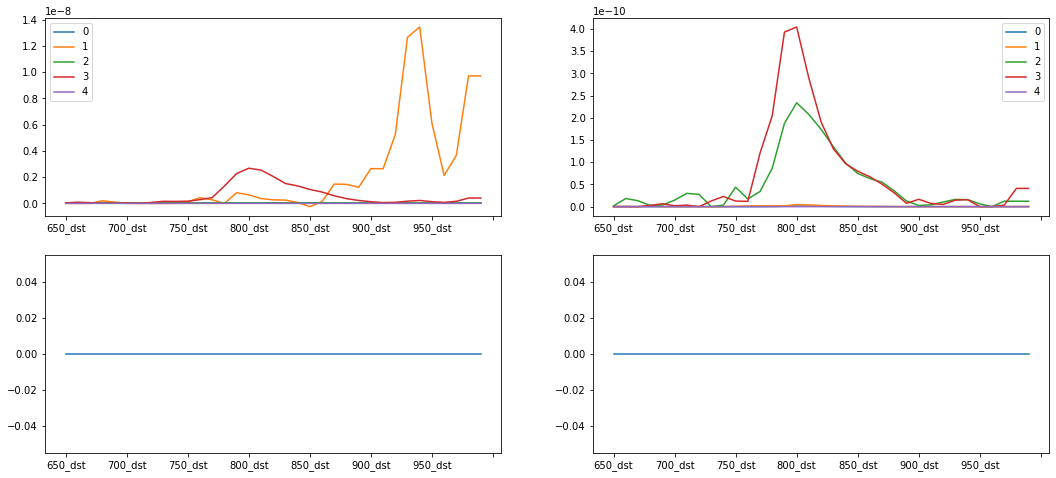

In [26]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)
train_dst_i.head().T.plot(ax=ax1)
test_dst_i.head().T.plot(ax=ax2)
train_dst_i.isnull().sum().plot(ax=ax3)
test_dst_i.isnull().sum().plot(ax=ax4)

In [27]:
# train/test data를 update함
train.update(train_dst_i)
test.update(test_dst_i)
train

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,-5.781541e-20,0.000000e+00,6.704443e-19,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,3.657651e-09,9.710091e-09,9.710091e-09,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,1.329725e-18,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,1.581612e-10,4.088921e-10,4.088921e-10,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,3.492081e-15,1.330237e-13,1.330237e-13,1.330237e-13,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,12.68,4.11,12.31,0.10
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,1.814274e-16,1.117148e-16,7.352416e-17,-2.074136e-16,5.825347e-16,4.226436e-15,8.46,4.11,10.46,3.12
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,4.828451e-11,3.110419e-11,8.119095e-12,3.266751e-11,1.504115e-10,4.003657e-10,9.84,3.20,10.45,2.06
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.279271e-13,0.000000e+00,4.475946e-14,-2.248515e-13,2.818857e-12,1.408742e-11,6.38,4.06,11.28,4.03


In [28]:
test

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,1.004758e-15,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,5.547335e-14,2.830975e-14,1.114337e-13,4.825731e-14,4.160421e-15,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,2.674370e-12,3.892171e-12,1.040143e-11,1.630158e-11,1.569208e-11,6.242378e-12,-9.809426e-14,1.219010e-11,1.219010e-11,1.219010e-11
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,1.455308e-11,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,4.106134e-11
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,15,0.04334,0.03279,0.05853,0.04070,0.07704,0.07859,0.06168,0.08903,...,7.889599e-13,5.747032e-13,4.903209e-13,1.365078e-12,7.929664e-13,0.000000e+00,0.000000e+00,1.472213e-13,1.479745e-12,5.391520e-12
9996,19996,25,0.00020,0.02009,0.01726,0.03816,0.08300,0.08681,0.15300,0.18099,...,1.240848e-17,6.258180e-18,8.693704e-20,1.190030e-18,4.514449e-18,4.131939e-18,9.128300e-19,-1.612454e-18,3.928314e-18,2.586781e-17
9997,19997,15,0.00000,0.00000,0.00120,0.00000,0.04347,0.14882,0.40883,0.80365,...,0.000000e+00,-7.853495e-15,0.000000e+00,2.610282e-14,7.789652e-15,-3.050833e-15,1.271388e-15,1.436617e-15,0.000000e+00,1.743751e-13
9998,19998,20,0.08390,0.05690,0.08343,0.12324,0.12720,0.16732,0.18149,0.23766,...,0.000000e+00,7.084232e-18,5.540477e-18,0.000000e+00,2.669004e-18,8.586549e-18,0.000000e+00,4.489194e-18,2.892986e-17,2.892986e-17


<AxesSubplot:>

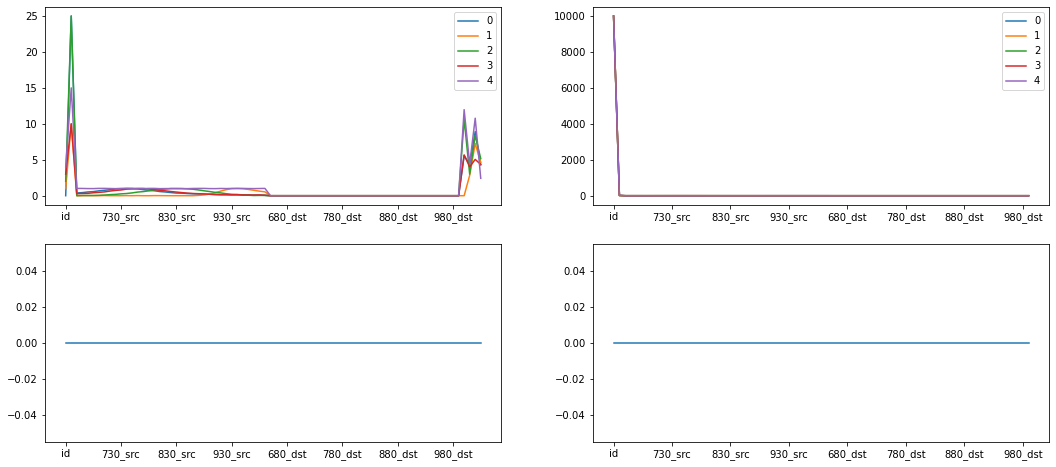

In [29]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)
train.head().T.plot(ax=ax1)
test.head().T.plot(ax=ax2)
train.isnull().sum().plot(ax=ax3)
test.isnull().sum().plot(ax=ax4)

## 흡광도 A 컬럼 만들기

In [30]:
# beer-lambert 법칙 --> 흡광도 A 컬럼 만들기
# np.log(src/dst) ratio2
# np.log(src/dst)/(rho*0.1) ratio
for i in range(35):
    train[f'{650+(i*10)}_ratio']=np.log(train[f'{650+(i*10)}_src']/train[f'{650+(i*10)}_dst'])/(train['rho']*0.1)
    test[f'{650+(i*10)}_ratio']=np.log(test[f'{650+(i*10)}_src']/test[f'{650+(i*10)}_dst'])/(test['rho']*0.1)     

In [31]:
for i in range(35):
    train[f'{650+(i*10)}_ratio2']=np.log(train[f'{650+(i*10)}_src']/train[f'{650+(i*10)}_dst'])
    test[f'{650+(i*10)}_ratio2']=np.log(test[f'{650+(i*10)}_src']/test[f'{650+(i*10)}_dst'])

<AxesSubplot:>

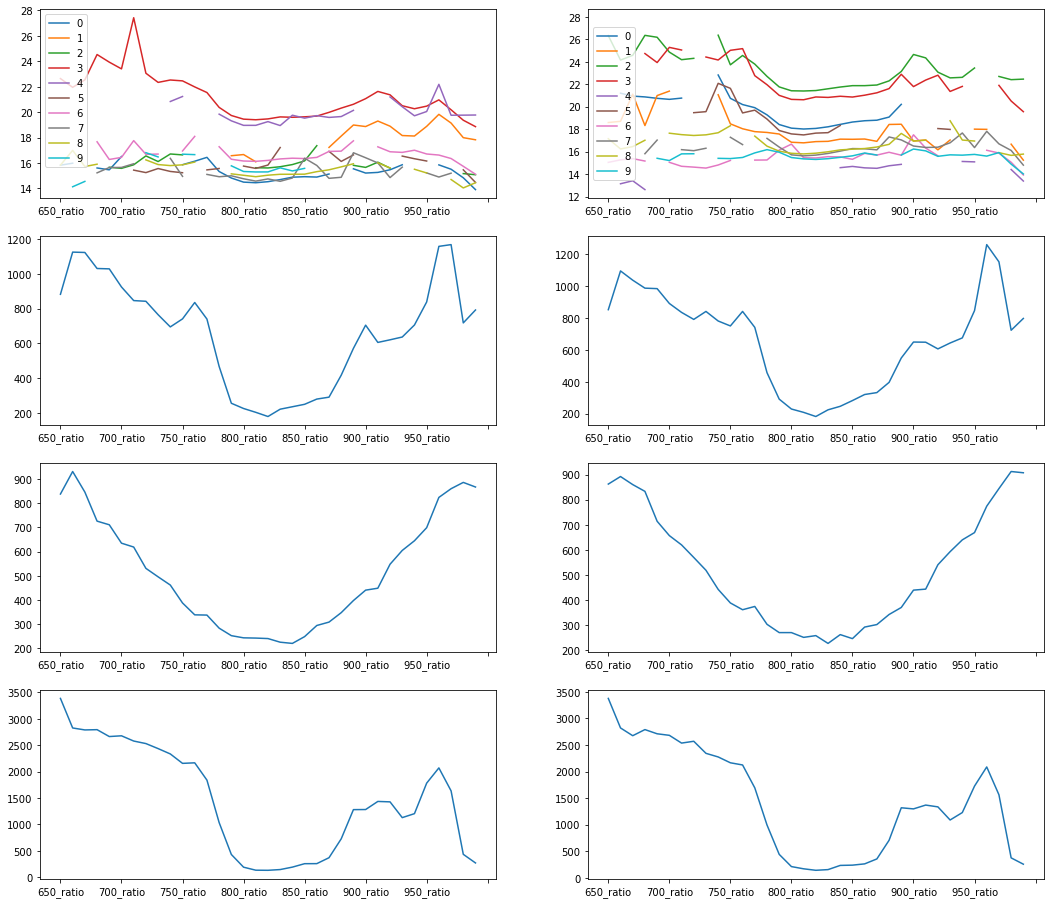

In [32]:
# ratio의 그래프, 빈값, 음의 무한대, 양의 무한대
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train.filter(regex='_ratio$', axis='columns').head(10).T.plot(ax=ax1)
test.filter(regex='_ratio$', axis='columns').head(10).T.plot(ax=ax2)
train.filter(regex='_ratio$', axis='columns').isnull().sum().plot(ax=ax3)
test.filter(regex='_ratio$', axis='columns').isnull().sum().plot(ax=ax4)
train.filter(regex='_ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='_ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train.filter(regex='_ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='_ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)
#빈값들은 채워주는 편이 좋다

<AxesSubplot:>

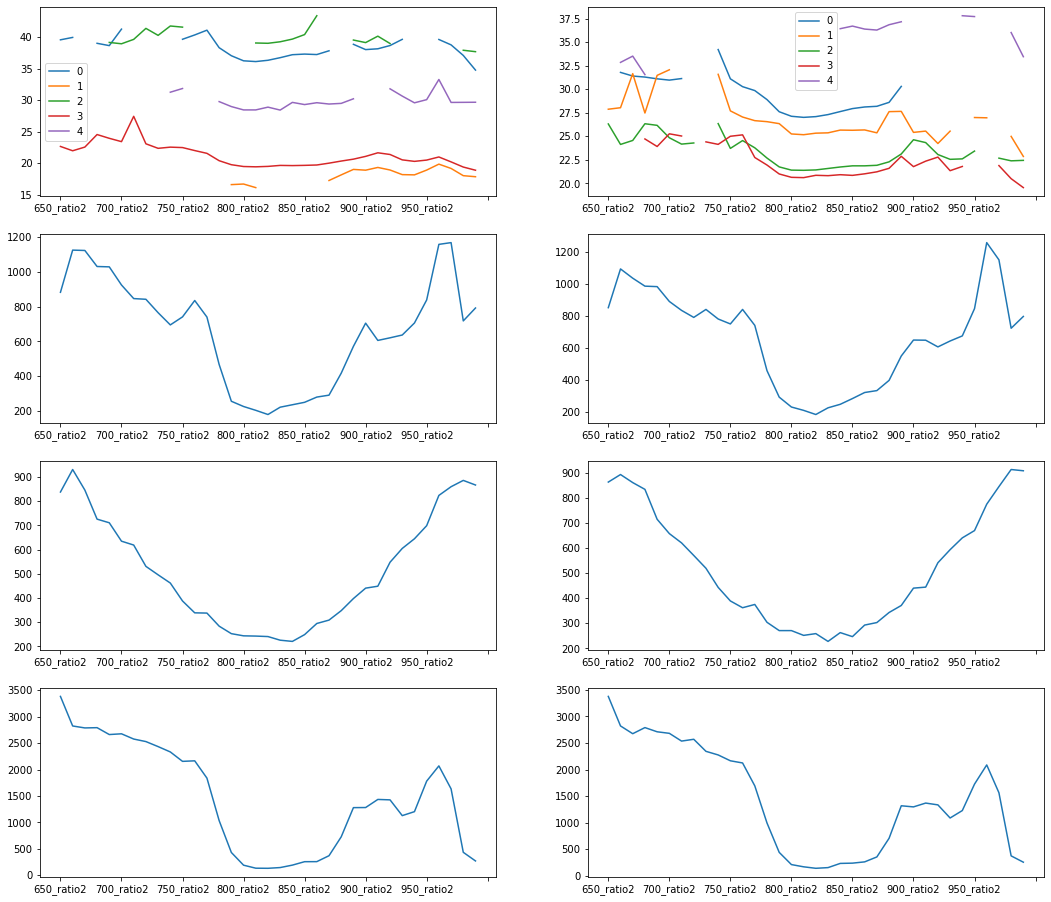

In [33]:
# ratio2의 그래프, 빈값, 음의 무한대, 양의 무한대
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train.filter(regex='_ratio2$', axis='columns').head().T.plot(ax=ax1)
test.filter(regex='_ratio2$', axis='columns').head().T.plot(ax=ax2)
train.filter(regex='_ratio2$', axis='columns').isnull().sum().plot(ax=ax3)
test.filter(regex='_ratio2$', axis='columns').isnull().sum().plot(ax=ax4)
train.filter(regex='_ratio2$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='_ratio2$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train.filter(regex='_ratio2$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='_ratio2$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

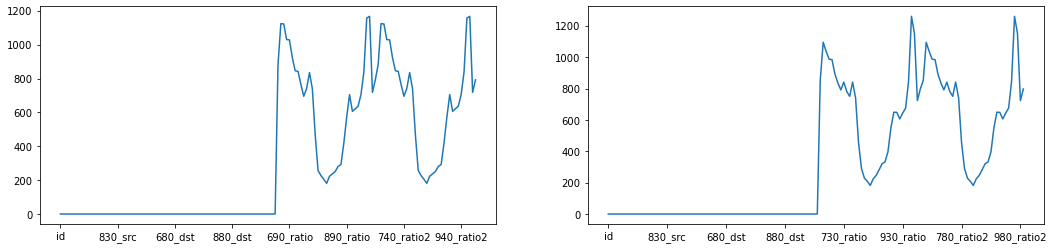

In [34]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)
train.isnull().sum().plot(ax=ax1)
test.isnull().sum().plot(ax=ax2)

In [35]:
# 음의 무한대와 양의 무한대를 np.nan로 변경
#train_r = train.filter(regex='_ratio$', axis='columns').replace(float('-inf'), np.nan).replace(float('inf'), np.nan)
#test_r = test.filter(regex='_ratio$', axis='columns').replace(float('-inf'), np.nan).replace(float('inf'), np.nan)

#train_r2 = train.filter(regex='_ratio2$', axis='columns').replace(float('-inf'), np.nan).replace(float('inf'), np.nan)
#test_r2 = test.filter(regex='_ratio2$', axis='columns').replace(float('-inf'), np.nan).replace(float('inf'), np.nan)

train_r = train.replace(float('-inf'), np.nan).replace(float('inf'), np.nan)
test_r = test.replace(float('-inf'), np.nan).replace(float('inf'), np.nan)

<AxesSubplot:>

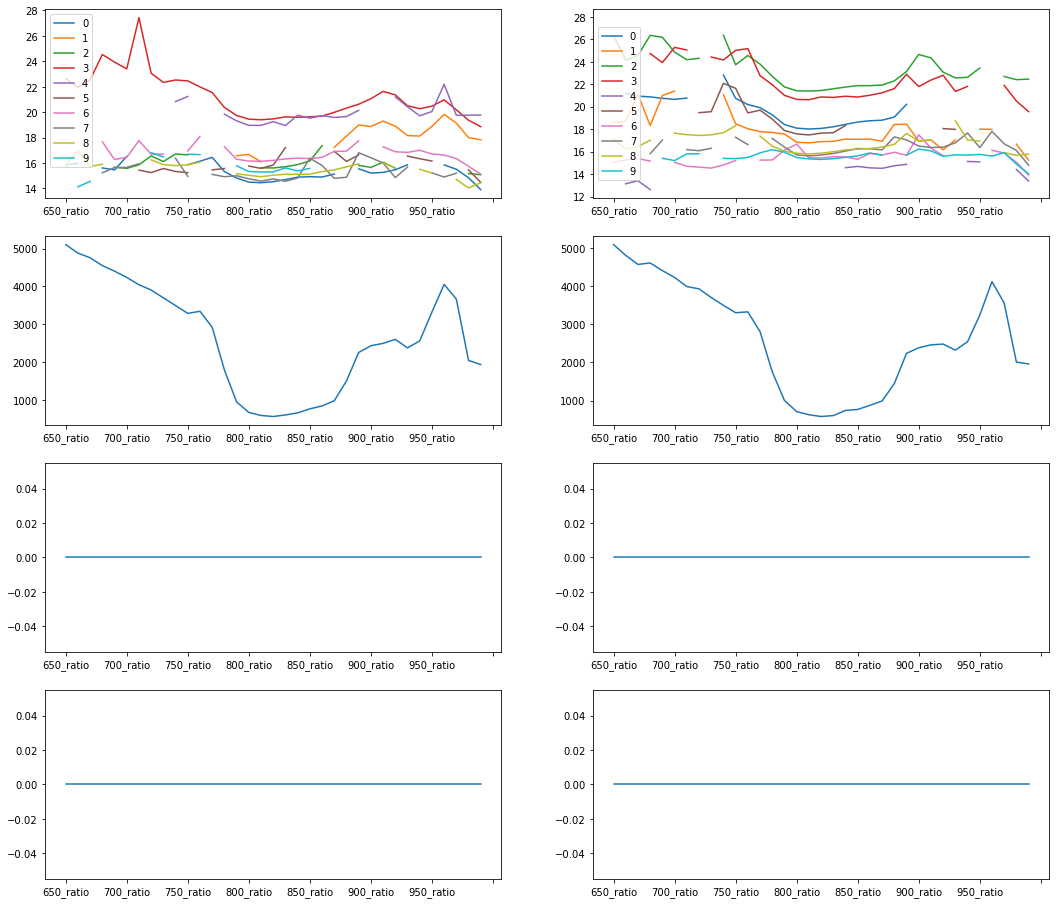

In [36]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r.filter(regex='_ratio$', axis='columns').head(10).T.plot(ax=ax1)
test_r.filter(regex='_ratio$', axis='columns').head(10).T.plot(ax=ax2)
train_r.filter(regex='_ratio$', axis='columns').isnull().sum().plot(ax=ax3)
test_r.filter(regex='_ratio$', axis='columns').isnull().sum().plot(ax=ax4)
train_r.filter(regex='_ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test_r.filter(regex='_ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train_r.filter(regex='_ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test_r.filter(regex='_ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

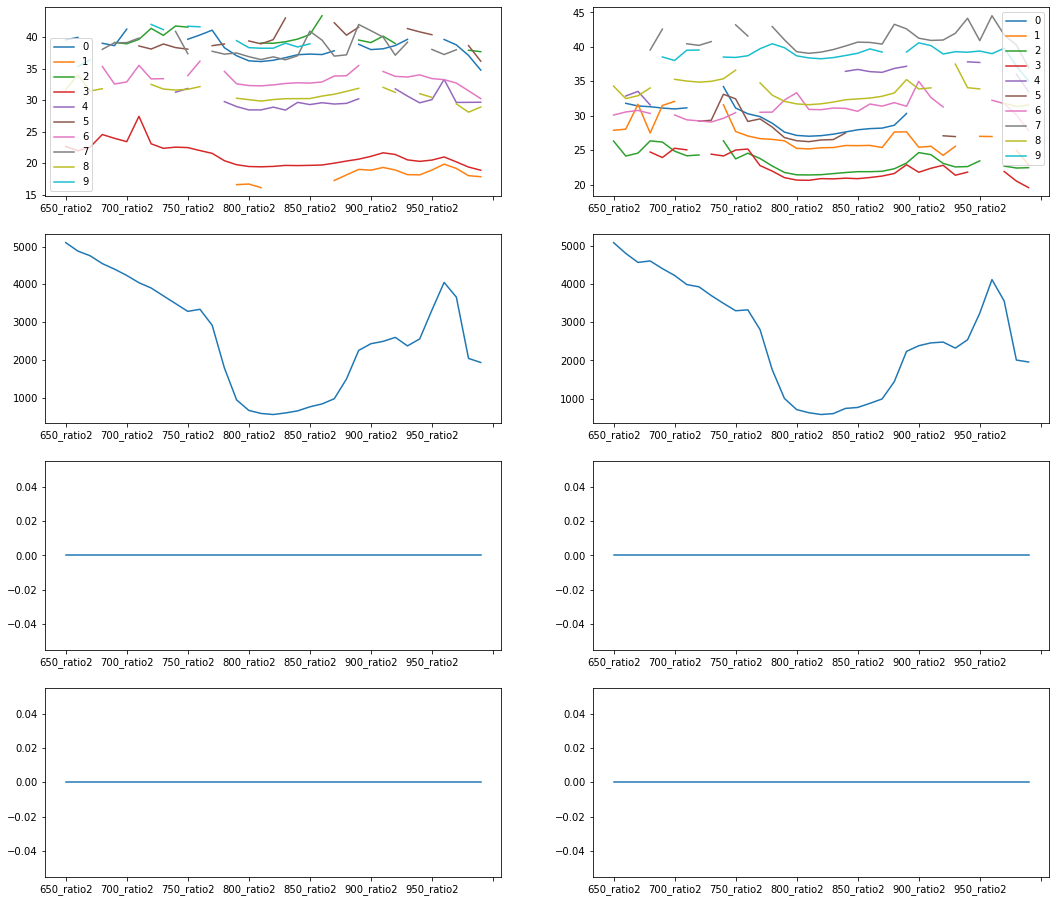

In [37]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r.filter(regex='_ratio2$', axis='columns').head(10).T.plot(ax=ax1)
test_r.filter(regex='_ratio2$', axis='columns').head(10).T.plot(ax=ax2)
train_r.filter(regex='_ratio2$', axis='columns').isnull().sum().plot(ax=ax3)
test_r.filter(regex='_ratio2$', axis='columns').isnull().sum().plot(ax=ax4)
train_r.filter(regex='_ratio2$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test_r.filter(regex='_ratio2$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train_r.filter(regex='_ratio2$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test_r.filter(regex='_ratio2$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

## A 컬럼 보간하기

In [38]:
# ratio와 ratio2간 인접한 컬럼끼리 보간되는 것을 막기 위해 분리함
train_r1 = train_r.filter(regex='_ratio$', axis='columns')
train_r2 = train_r.filter(regex='_ratio2$', axis='columns')

test_r1 = test_r.filter(regex='_ratio$', axis='columns')
test_r2 = test_r.filter(regex='_ratio2$', axis='columns')

In [39]:
# 문자열 컬럼을 숫자 컬렴으로 변경
train_r1.columns = list(650 + np.arange(35)*10)
train_r2.columns = list(650 + np.arange(35)*10)

test_r1.columns = list(650 + np.arange(35)*10)
test_r2.columns = list(650 + np.arange(35)*10)

In [40]:
# polynomial 보간
train_r1 = train_r1.interpolate(method='polynomial', order=3, axis=1)
train_r2 = train_r2.interpolate(method='polynomial', order=3, axis=1)

test_r1 = test_r1.interpolate(method='polynomial', order=3, axis=1)
test_r2 = test_r2.interpolate(method='polynomial', order=3, axis=1)

In [41]:
# linear 보간
train_r1 = train_r1.interpolate(method='linear', axis=1)
train_r2 = train_r2.interpolate(method='linear', axis=1)

test_r1 = test_r1.interpolate(method='linear', axis=1)
test_r2 = test_r2.interpolate(method='linear', axis=1)

In [42]:
# 숫자 컬럼을 문자열 컬럼으로 변경
train_r1.columns = train.filter(regex='_ratio$', axis='columns').columns
train_r2.columns = train.filter(regex='_ratio2$', axis='columns').columns

test_r1.columns = test.filter(regex='_ratio$', axis='columns').columns
test_r2.columns = test.filter(regex='_ratio2$', axis='columns').columns

test_r2.columns

Index(['650_ratio2', '660_ratio2', '670_ratio2', '680_ratio2', '690_ratio2',
       '700_ratio2', '710_ratio2', '720_ratio2', '730_ratio2', '740_ratio2',
       '750_ratio2', '760_ratio2', '770_ratio2', '780_ratio2', '790_ratio2',
       '800_ratio2', '810_ratio2', '820_ratio2', '830_ratio2', '840_ratio2',
       '850_ratio2', '860_ratio2', '870_ratio2', '880_ratio2', '890_ratio2',
       '900_ratio2', '910_ratio2', '920_ratio2', '930_ratio2', '940_ratio2',
       '950_ratio2', '960_ratio2', '970_ratio2', '980_ratio2', '990_ratio2'],
      dtype='object')

<AxesSubplot:>

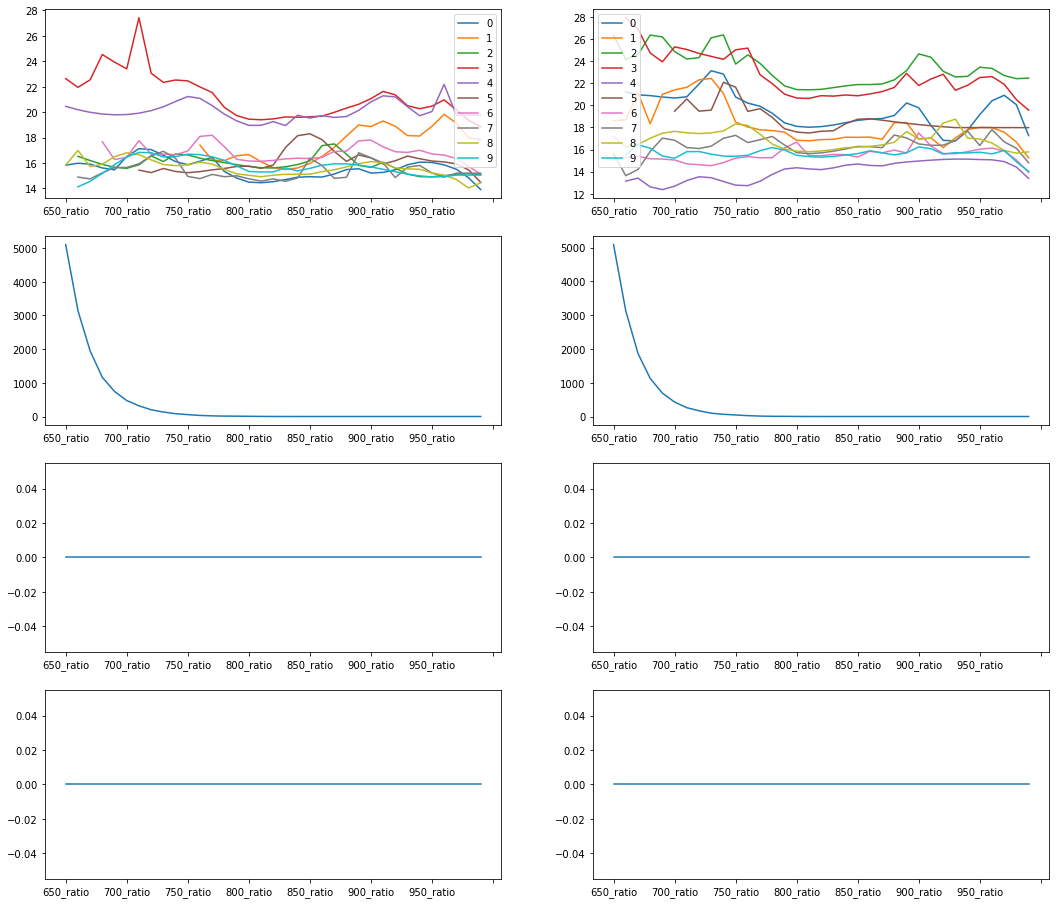

In [43]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r1.head(10).T.plot(ax=ax1)
test_r1.head(10).T.plot(ax=ax2)
train_r1.isnull().sum().plot(ax=ax3)
test_r1.isnull().sum().plot(ax=ax4)
train_r1.isin([float('-inf')]).sum().plot(ax=ax5)
test_r1.isin([float('-inf')]).sum().plot(ax=ax6)
train_r1.isin([float('inf')]).sum().plot(ax=ax7)
test_r1.isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

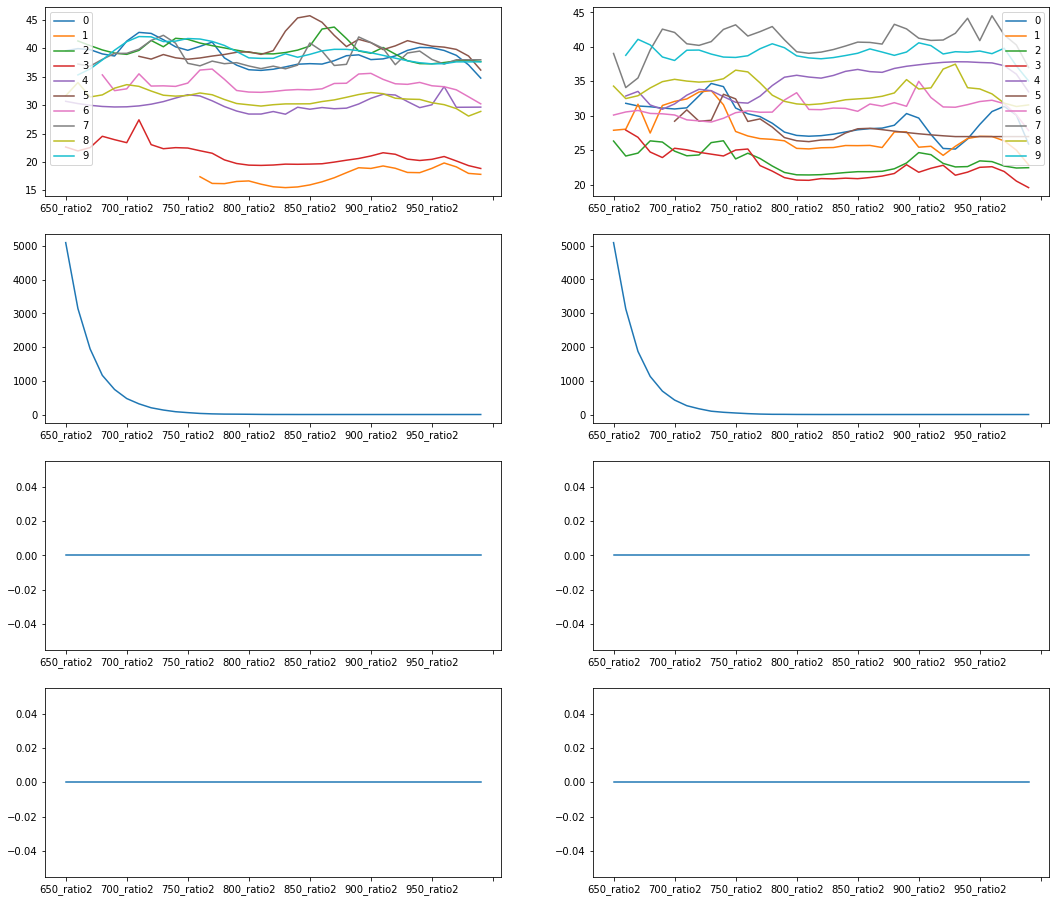

In [44]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r2.head(10).T.plot(ax=ax1)
test_r2.head(10).T.plot(ax=ax2)
train_r2.isnull().sum().plot(ax=ax3)
test_r2.isnull().sum().plot(ax=ax4)
train_r2.isin([float('-inf')]).sum().plot(ax=ax5)
test_r2.isin([float('-inf')]).sum().plot(ax=ax6)
train_r2.isin([float('inf')]).sum().plot(ax=ax7)
test_r2.isin([float('inf')]).sum().plot(ax=ax8)

In [45]:
# 오른쪽 보간
for i in range(34): # ratio
    train_r1.loc[train_r1[f'{980-(i*10)}_ratio'].isnull(),
                 f'{980-(i*10)}_ratio'] = train_r1.loc[train_r1[f'{980-(i*10)}_ratio'].isnull(),
                                                       f'{990-(i*10)}_ratio']
    test_r1.loc[test_r1[f'{980-(i*10)}_ratio'].isnull(),
                f'{980-(i*10)}_ratio'] = test_r1.loc[test_r1[f'{980-(i*10)}_ratio'].isnull(),
                                                     f'{990-(i*10)}_ratio']
for i in range(34): # ratio2
    train_r2.loc[train_r2[f'{980-(i*10)}_ratio2'].isnull(),
                 f'{980-(i*10)}_ratio2'] = train_r2.loc[train_r2[f'{980-(i*10)}_ratio2'].isnull(),
                                                        f'{990-(i*10)}_ratio2']
    test_r2.loc[test_r2[f'{980-(i*10)}_ratio2'].isnull(),
                f'{980-(i*10)}_ratio2'] = test_r2.loc[test_r2[f'{980-(i*10)}_ratio2'].isnull(),
                                                      f'{990-(i*10)}_ratio2']

<AxesSubplot:>

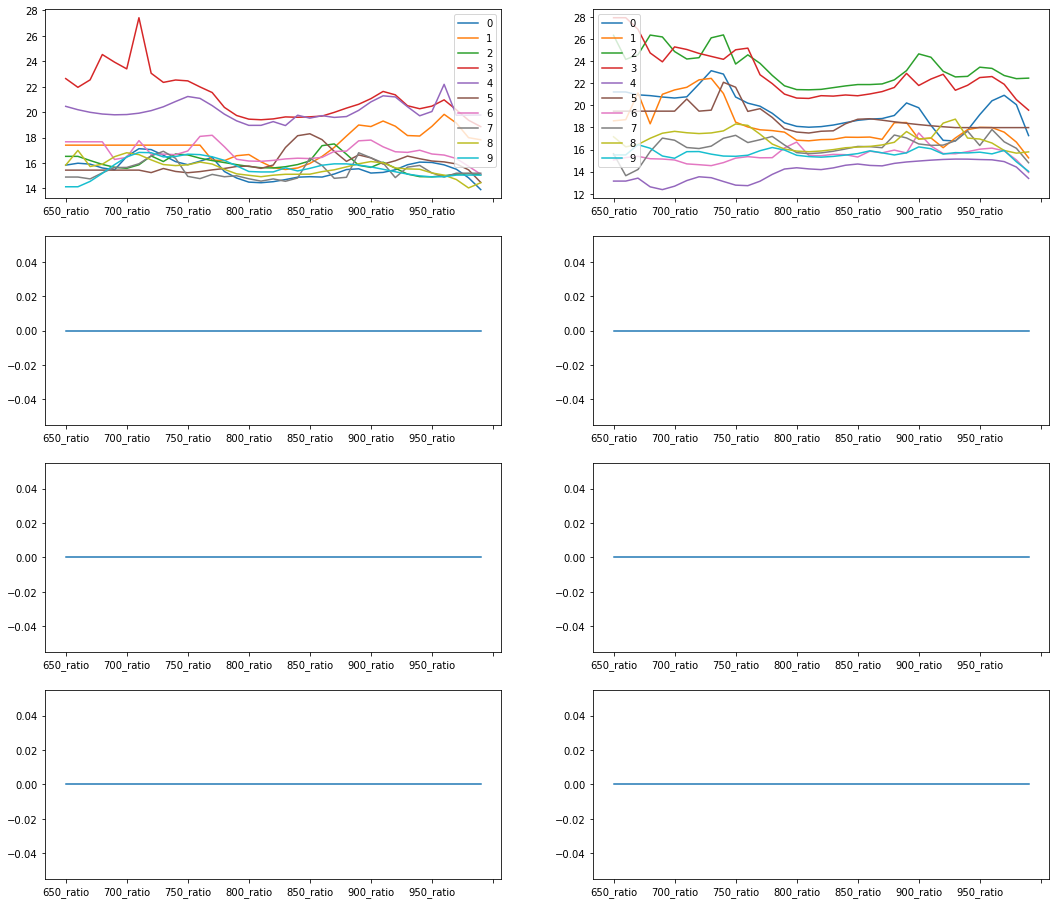

In [46]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r1.head(10).T.plot(ax=ax1)
test_r1.head(10).T.plot(ax=ax2)
train_r1.isnull().sum().plot(ax=ax3)
test_r1.isnull().sum().plot(ax=ax4)
train_r1.isin([float('-inf')]).sum().plot(ax=ax5)
test_r1.isin([float('-inf')]).sum().plot(ax=ax6)
train_r1.isin([float('inf')]).sum().plot(ax=ax7)
test_r1.isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

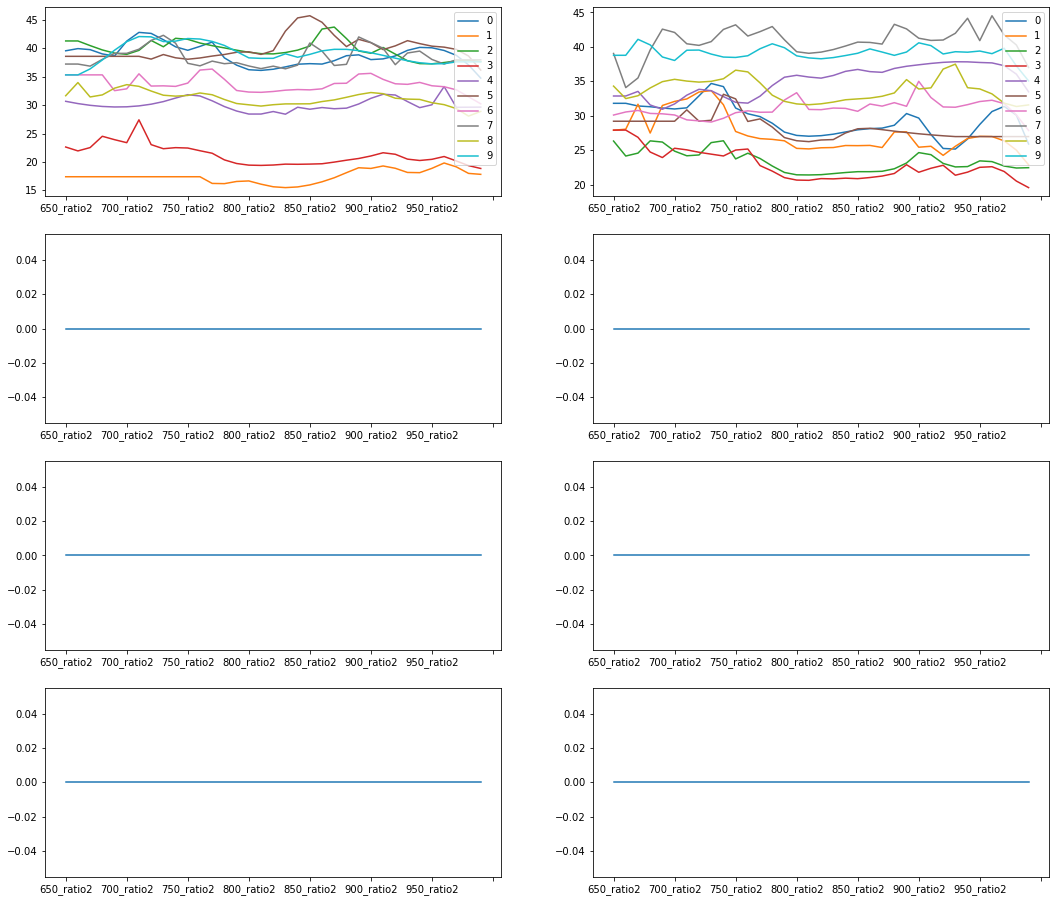

In [47]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r2.head(10).T.plot(ax=ax1)
test_r2.head(10).T.plot(ax=ax2)
train_r2.isnull().sum().plot(ax=ax3)
test_r2.isnull().sum().plot(ax=ax4)
train_r2.isin([float('-inf')]).sum().plot(ax=ax5)
test_r2.isin([float('-inf')]).sum().plot(ax=ax6)
train_r2.isin([float('inf')]).sum().plot(ax=ax7)
test_r2.isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

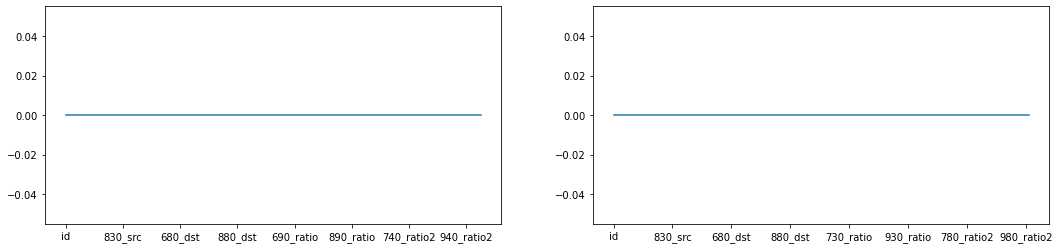

In [48]:
train.update(train_r1)
train.update(train_r2)

test.update(test_r1)
test.update(test_r2)

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

train.isnull().sum().plot(ax=ax1)
test.isnull().sum().plot(ax=ax2)

## 분석

In [49]:
train.columns

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src',
       ...
       '900_ratio2', '910_ratio2', '920_ratio2', '930_ratio2', '940_ratio2',
       '950_ratio2', '960_ratio2', '970_ratio2', '980_ratio2', '990_ratio2'],
      dtype='object', length=146)

<AxesSubplot:>

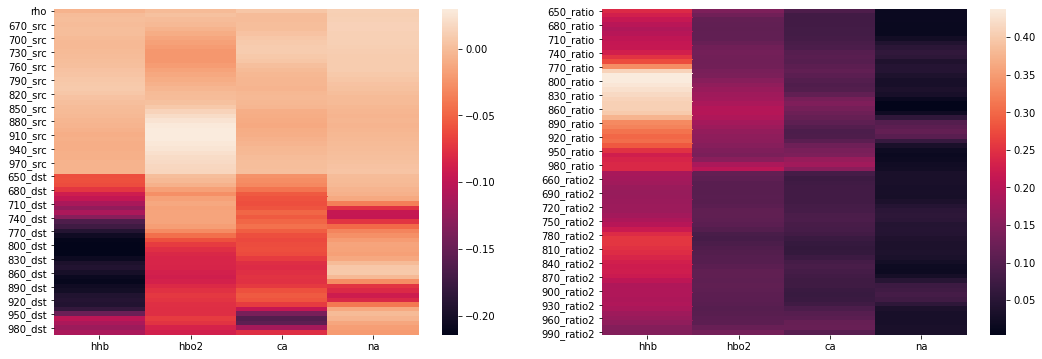

In [50]:
# src 컬럼이 불필요해 보임
# dst, ratio, ratio2 컬럼 모두 hhb 예측하는데 도움이 되나 ca, na 예측하는데는 효율성이 떨어져 보임
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['rho':'990_dst', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio':'990_ratio2', 'hhb':'na'], ax=ax2)

In [51]:
# 기존 Beer-Lambertt law: A = E*rho*농도
# Brain's Beer-Lambertt law: A = E*rho*농도*DPF + G
# G : Geometry(측정 대상의 기하학적인 구조)
# DPF : 입사한 빛이 매질을 뚫고 지나갈 때 경로의 평균 경로의 길이
# G랑 DPF도 구해야 한다
# 방법1 : 미분
# 방법2 :두 케이스를 빼서 G를 없애기

In [52]:
# 방법2 :두 케이스를 빼서 G를 없애기
# A = E*rho*농도*DPF + G
# DPF : 파장에 따라서 변함
# E : 파장에 따라서 변함
# G : 파장에 따라서 변하지 않음
# 대충 쓰자면 
#650_ratio = E*rho*농도*DPF + G
#750_ratio = E*rho*농도*DPF + G
#650_ratio - 750_ratio = E*rho*농도*DPF - E*rho*농도*DPF
#G 는 서로 같기 때문에 빼면 사라진다

In [53]:
# ca, na 농도 예측을 높일 수 있는 새로운 컬럼 찾는 것
# G 값 제거를 위해 ratio, ratio2 컬럼 파장 별로 빼기를 한 새로운 컬럼

# ratio 빼기
for i in range(35):
    train[f'{650+(10*i)}_ratio_diff'] = train[f'{650+(10*i)}_ratio'] - train['990_ratio']
    test[f'{650+(10*i)}_ratio_diff'] = test[f'{650+(10*i)}_ratio'] - test['990_ratio']

for i in range(35):
    train[f'{650+(10*i)}_ratio_diff2'] = train[f'{650+(10*i)}_ratio'] - (train['850_ratio']+train['860_ratio'])/2
    test[f'{650+(10*i)}_ratio_diff2'] = test[f'{650+(10*i)}_ratio'] - (test['850_ratio']+test['860_ratio'])/2

In [54]:
# ratio2 빼기
for i in range(35):
    train[f'{650+(10*i)}_ratio2_diff'] = train[f'{650+(10*i)}_ratio2'] - train['810_ratio2']
    test[f'{650+(10*i)}_ratio2_diff'] = test[f'{650+(10*i)}_ratio2'] - test['810_ratio2']

<AxesSubplot:>

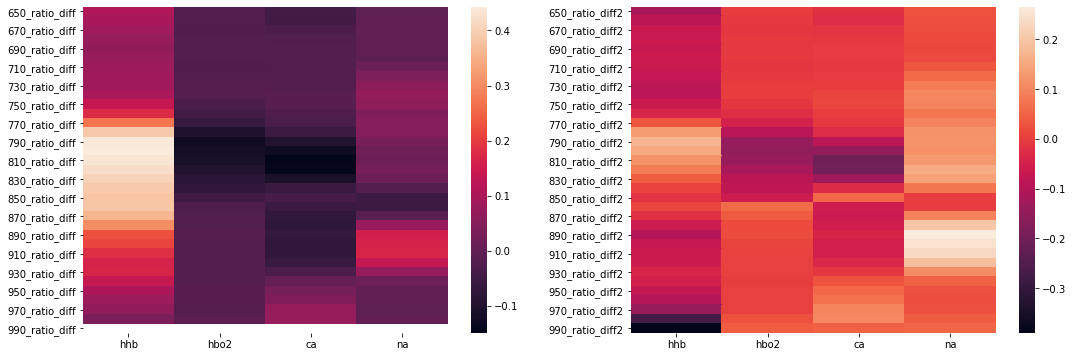

In [55]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff':'990_ratio_diff', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff2':'990_ratio_diff2', 'hhb':'na'], ax=ax2)

<AxesSubplot:>

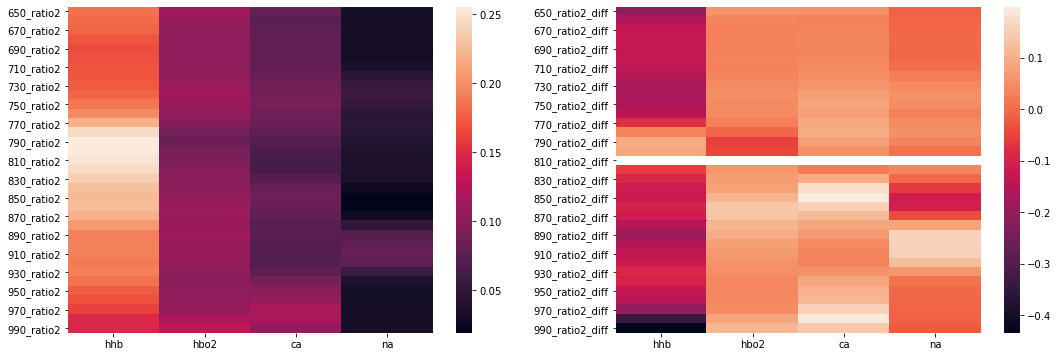

In [56]:
# ratio2_diff 컬럼은 ca 농도 예측에 도움이 될 것으로 예상됨
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio2':'990_ratio2', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio2_diff':'990_ratio2_diff', 'hhb':'na'], ax=ax2)

In [57]:
# 빼기 컬럼을 만들어 해보세요. 790~830_ratio 범위를 빼보세요

for i in range(5):
    for j in range(35):
        train[f'{650+(10*j)}_ratio_diff_tt{790+(10*i)}'] = train[f'{650+(10*j)}_ratio'] - train[f'{790+(10*i)}_ratio']
        test[f'{650+(10*j)}_ratio_diff_tt{790+(10*i)}'] = train[f'{650+(10*j)}_ratio'] - train[f'{790+(10*i)}_ratio']

for i in range(5):
    for j in range(35):
        train[f'{650+(10*j)}_ratio_diff_ttt{i}'] = train[f'{650+(10*j)}_ratio'] - (train[f'{790+(10*i)}_ratio']+train[f'{800+(10*i)}_ratio'])/2
        test[f'{650+(10*j)}_ratio_diff_ttt{i}'] = train[f'{650+(10*j)}_ratio'] - (test[f'{790+(10*i)}_ratio']+test[f'{800+(10*i)}_ratio'])/2

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff_tt790':'990_ratio_diff_tt790', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff_ttt0':'990_ratio_diff_ttt0', 'hhb':'na'], ax=ax2)

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff_tt800':'990_ratio_diff_tt800', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff_ttt1':'990_ratio_diff_ttt1', 'hhb':'na'], ax=ax2)

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff_tt810':'990_ratio_diff_tt810', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff_ttt2':'990_ratio_diff_ttt2', 'hhb':'na'], ax=ax2)

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff_tt820':'990_ratio_diff_tt820', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff_ttt2':'990_ratio_diff_ttt2', 'hhb':'na'], ax=ax2)

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff_tt830':'990_ratio_diff_tt830', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff_ttt3':'990_ratio_diff_ttt3', 'hhb':'na'], ax=ax2)

In [62]:
# 강사님 하신 방법
for i in range(35):
    train[f'{650+(10*i)}_ratio_diff3'] = train[f'{650+(10*i)}_ratio'] - (train['810_ratio']+train['820_ratio'])/2
    test[f'{650+(10*i)}_ratio_diff3'] = train[f'{650+(10*i)}_ratio'] - (test['810_ratio']+test['820_ratio'])/2
for i in range(35):
    train[f'{650+(10*i)}_ratio_diff4'] = train[f'{650+(10*i)}_ratio'] - (train['800_ratio']+train['810_ratio'])/2
    test[f'{650+(10*i)}_ratio_diff4'] = train[f'{650+(10*i)}_ratio'] - (test['800_ratio']+test['810_ratio'])/2

In [63]:
for i in range(35):
    train[f'{650+(10*i)}_ratio_diff5'] = train[f'{650+(10*i)}_ratio'] - train['820_ratio']
    test[f'{650+(10*i)}_ratio_diff5'] = train[f'{650+(10*i)}_ratio'] - test['820_ratio']
for i in range(35):   
    train[f'{650+(10*i)}_ratio_diff6'] = train[f'{650+(10*i)}_ratio'] - train['790_ratio']
    test[f'{650+(10*i)}_ratio_diff6'] = train[f'{650+(10*i)}_ratio'] - test['790_ratio']
for i in range(35):   
    train[f'{650+(10*i)}_ratio_diff7'] = train[f'{650+(10*i)}_ratio'] - train['840_ratio']
    test[f'{650+(10*i)}_ratio_diff7'] = train[f'{650+(10*i)}_ratio'] - test['840_ratio']

<AxesSubplot:>

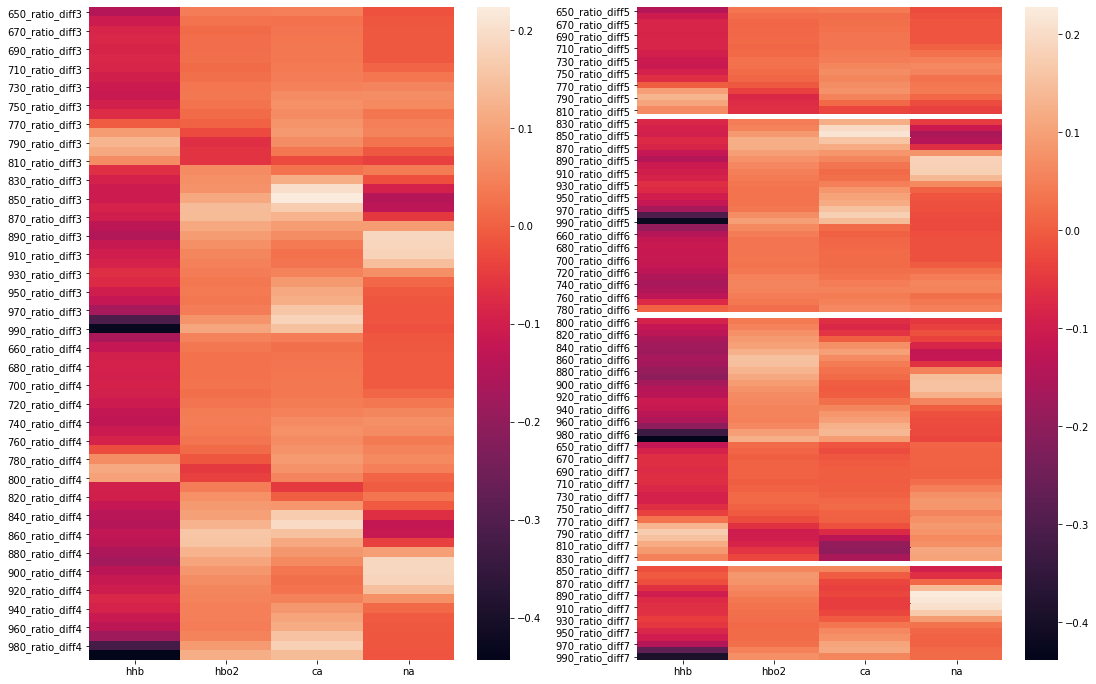

In [64]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,12)
sns.heatmap(train.corr().loc['650_ratio_diff3':'990_ratio_diff4', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff5':'990_ratio_diff7', 'hhb':'na'], ax=ax2)

In [61]:
# (E*rho*농도*DPF + G) / (A 컬럼 평균)
# 비율로 나누면 편차가 줄어든다

In [76]:
# ratio를 평균과 나눠서 그 비율로 새로운 컬럼 생성
# 노이즈나 이상치의 영향을 줄여주는 효과
# 많은 회수의 반복문을 쓸 경우tqdm을 사용하면 계산 시간을 10분의 1까지 줄일 수 있음
train_ratio = train.filter(regex='_ratio$', axis='columns')
test_ratio = test.filter(regex='_ratio$', axis='columns')

for i in tqdm(train_ratio.index):
    train_ratio.loc[i] = train_ratio.loc[i] / train_ratio.loc[i].replace(0, np.nan).mean()
    
for i in tqdm(train_ratio.index):
    test_ratio.loc[i] = test_ratio.loc[i] / test_ratio.loc[i].replace(0, np.nan).mean()
    
for i in range(35):
    train[f'{650+(10*i)}_ratio_m'] = train_ratio[f'{650+(10*i)}_ratio']
    test[f'{650+(10*i)}_ratio_m'] = test_ratio[f'{650+(10*i)}_ratio']

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1065.00it/s]


<AxesSubplot:>

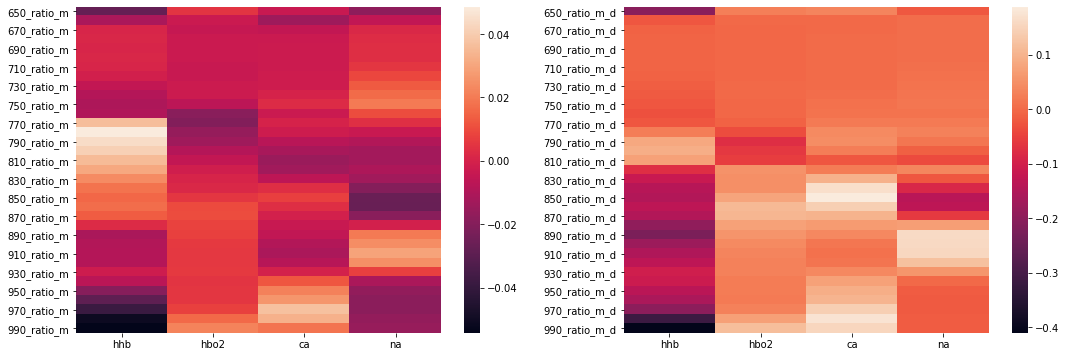

In [81]:
for i in range(35):
    train[f'{650+(10*i)}_ratio_m_d'] = train[f'{650+(10*i)}_ratio_m'] - (train['810_ratio_m']+train['820_ratio_m'])/2
    test[f'{650+(10*i)}_ratio_m_d'] = test[f'{650+(10*i)}_ratio_m'] - (test['810_ratio_m']+test['820_ratio_m'])/2
    
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_m':'990_ratio_m', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_m_d':'990_ratio_m_d', 'hhb':'na'], ax=ax2)

In [82]:
# 롤링, 이동평균은 전체 데이터 집합의 여러 하위 집합에 대한
# 일련의 평균을 만들어 데이터 요소를 분석하는 계산
# 800_ratio를 플마 2칸 기준 롤링을 하면
# 780_ratio, 790_ratio, 800_ratio, 810_ratio, 820_ratio / 5 = 800_ratio_rolling
# 그 다음은 790_ratio, 800_ratio, 810_ratio, 820_ratio, 830_ratio / 5 = 810_ratio_rolling